In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers


physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
image_size = (100,100)
input_shape = image_size +(1,)
batch_size = 32

train = tf.keras.preprocessing.image_dataset_from_directory(
    "./scrapper/images",
    validation_split=0.2,
    subset="training",
    seed=0,
    color_mode="grayscale",
    image_size=image_size,
    label_mode="categorical"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    "./scrapper/images",
    validation_split=0.2,
    subset="validation",
    seed=0,
    color_mode="grayscale",
    image_size=image_size,
    label_mode="categorical"
)

Found 489 files belonging to 2 classes.
Using 392 files for training.
Found 489 files belonging to 2 classes.
Using 97 files for validation.


In [3]:
dataset = train.unbatch()
new = list(dataset.as_numpy_iterator())

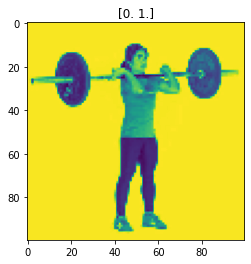

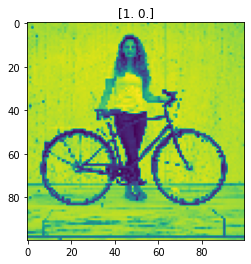

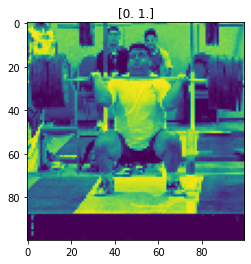

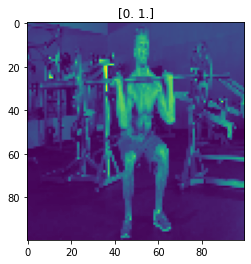

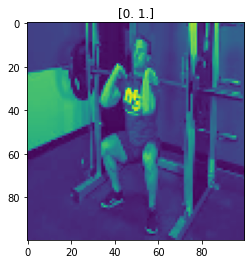

In [4]:
for i in range(5):
    plt.imshow(image.array_to_img(new[i][0])) 
    plt.title(str(new[i][1]))
    plt.show()

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),

    ]
)

classes = 2
inputs = keras.Input(shape=input_shape)

# Augment images
x = data_augmentation(inputs)

# Rescale image values
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)

# Add the rest of the model
outputs = layers.Conv2D(80, kernel_size=(4,4), activation='relu', input_shape=input_shape)(x)
#outputs = layers.Conv2D(16, (2,2), activation='relu')(outputs)
outputs = layers.MaxPooling2D(pool_size=(4,4))(outputs)
outputs = layers.Dropout(0.4)(outputs)
outputs = layers.Flatten()(outputs)
outputs = layers.Dense(32, activation='relu')(outputs)
outputs = layers.Dropout(0.4)(outputs)
outputs = layers.Dense(2, activation='softmax')(outputs)

model = keras.Model(inputs, outputs)

model.compile(loss=keras.losses.CategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(),
                 metrics=[keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 100, 100, 1)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 80)        1360      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 80)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 80)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 46080)             0   

In [ ]:
batch_size = 16
epochs = 100
history = model.fit(train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=test)

Epoch 1/100
13/13 [==============================] - 2s 68ms/step - loss: 0.8613 - categorical_accuracy: 0.5084 - val_loss: 0.6660 - val_categorical_accuracy: 0.5979
Epoch 2/100
13/13 [==============================] - 1s 54ms/step - loss: 0.6723 - categorical_accuracy: 0.5760 - val_loss: 0.6678 - val_categorical_accuracy: 0.5979
Epoch 3/100
13/13 [==============================] - 1s 58ms/step - loss: 0.6539 - categorical_accuracy: 0.6082 - val_loss: 0.6686 - val_categorical_accuracy: 0.5979
Epoch 4/100
13/13 [==============================] - 1s 58ms/step - loss: 0.6678 - categorical_accuracy: 0.6160 - val_loss: 0.6721 - val_categorical_accuracy: 0.5979
Epoch 5/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6774 - categorical_accuracy: 0.5954 - val_loss: 0.6652 - val_categorical_accuracy: 0.5979
Epoch 6/100
13/13 [==============================] - 1s 55ms/step - loss: 0.6505 - categorical_accuracy: 0.6097 - val_loss: 0.6631 - val_categorical_accuracy: 0.5979
Epoc

In [ ]:
score = model.evaluate(test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### Verify the predictions being made
---

In [ ]:
# Decode predictions didn't seem to work so well when not using
# xception network. This function should decode objects with 2 classes [0,1]
"""30

def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1,0])
    else:
        return [0,1]

num_items = len(Y)
squat_preds = first_model.predict(X[0:num_items,:,:,:])

decoded = np.apply_along_axis(decoder, 1, squat_preds)

incorrect_squats = []
incorrect_non_squats = []
for i in range(100):
    if np.array_equal(decoded[i],Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_squats.append(i)
        elif Y[i][1] == 0:
            incorrect_squats.append(i)

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
    
# No cats classified incorrectly

for i in incorrect_non_squats:
    plt.imshow(image.array_to_img(X[i,:,:,:])) 
    plt.show()
"""